In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### There is no any null values

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# encoading for catagorical featurs
df1 = pd.get_dummies(df['workclass'],prefix='workclass')
df2 = pd.get_dummies(df['education'],prefix='education')
df3 = pd.get_dummies(df['marital-status'],prefix='marital-status')
df4 = pd.get_dummies(df['occupation'],prefix='occupation')
df5 = pd.get_dummies(df['relationship'],prefix='relationship')
df6 = pd.get_dummies(df['race'],prefix='race')
df7 = pd.get_dummies(df['country'],prefix='country')
df = pd.concat([df,df1,df2,df3,df4,df5,df6,df7],axis=1)
df = df.drop(['workclass','education','marital-status','occupation','relationship','race','country'],axis=1)

df['sex'] = np.where(df['sex']==' Male',1,0)
df['salary'] = np.where(df['salary']==' <=50K',1,0)

In [7]:
df

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,39,77516,13,1,2174,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,0,38,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,1,0,0,20,1,0,0,...,0,0,0,0,0,0,0,1,0,0


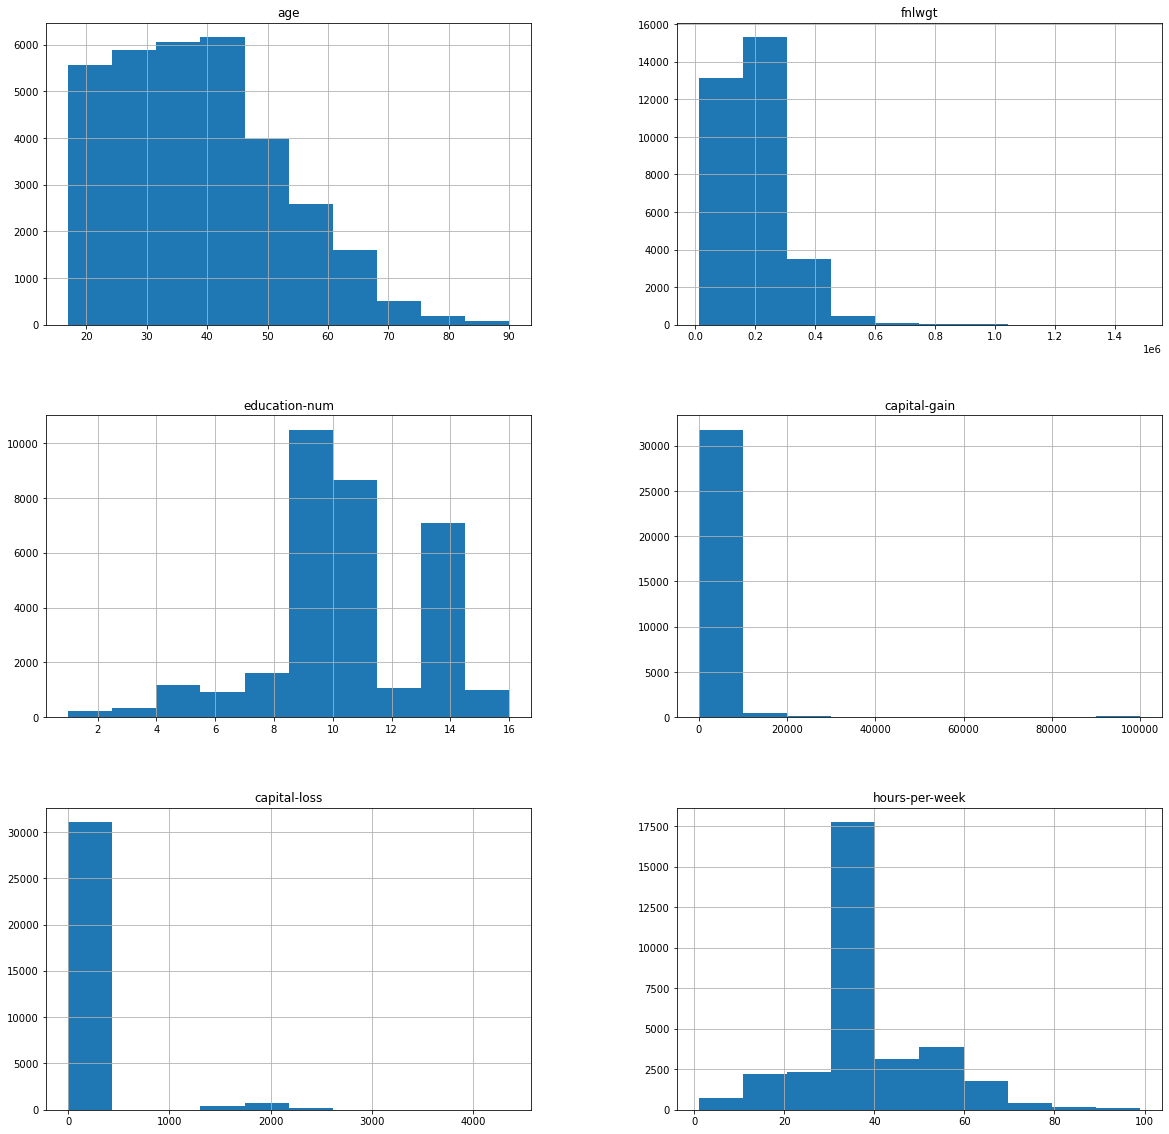

In [8]:
# for outlier detection

df.hist(['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week'],figsize=(20,20))

plt.show()

### There is no any outlier 

In [10]:
df


,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,39,77516,13,1,2174,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,0,38,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,1,0,0,20,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# prepering of standard scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_arry = scaler.fit_transform(df)
df_scaler = pd.DataFrame(df_arry,columns=df.columns)

In [12]:
df_scaler

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,0.030671,-1.063611,1.134739,0.703071,0.148453,-0.21666,-0.035429,0.563199,-0.24445,-0.174295,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
1,0.837109,-1.008707,1.134739,0.703071,-0.145920,-0.21666,-2.222153,0.563199,-0.24445,-0.174295,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
2,-0.042642,0.245079,-0.420060,0.703071,-0.145920,-0.21666,-0.035429,0.563199,-0.24445,-0.174295,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
3,1.057047,0.425801,-1.197459,0.703071,-0.145920,-0.21666,-0.035429,0.563199,-0.24445,-0.174295,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
4,-0.775768,1.408176,1.134739,-1.422331,-0.145920,-0.21666,-0.035429,0.563199,-0.24445,-0.174295,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-2.932948,-0.045408,-0.022173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-1.422331,-0.145920,-0.21666,-0.197409,0.563199,-0.24445,-0.174295,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
32557,0.103983,-0.335433,-0.420060,0.703071,-0.145920,-0.21666,-0.035429,-1.775573,-0.24445,-0.174295,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
32558,1.423610,-0.358777,-0.420060,-1.422331,-0.145920,-0.21666,-0.035429,0.563199,-0.24445,-0.174295,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
32559,-1.215643,0.110960,-0.420060,0.703071,-0.145920,-0.21666,-1.655225,0.563199,-0.24445,-0.174295,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173


In [13]:
x = df_scaler.drop('salary',axis=1)
y = df['salary']

In [14]:
x

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,0.030671,-1.063611,1.134739,0.703071,0.148453,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
1,0.837109,-1.008707,1.134739,0.703071,-0.145920,-0.21666,-2.222153,-0.24445,-0.174295,-0.262097,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
2,-0.042642,0.245079,-0.420060,0.703071,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
3,1.057047,0.425801,-1.197459,0.703071,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
4,-0.775768,1.408176,1.134739,-1.422331,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-2.932948,-0.045408,-0.022173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-1.422331,-0.145920,-0.21666,-0.197409,-0.24445,-0.174295,-0.262097,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
32557,0.103983,-0.335433,-0.420060,0.703071,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
32558,1.423610,-0.358777,-0.420060,-1.422331,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
32559,-1.215643,0.110960,-0.420060,0.703071,-0.145920,-0.21666,-1.655225,-0.24445,-0.174295,-0.262097,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173


 # Model building for cacifier problem

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
def Matrix(model_name,y_test,y_predict):
    matrix = confusion_matrix(y_test,y_predict)
    tn, fp, fn, tp = matrix.ravel()
    Accuracy = accuracy_score(y_test,y_predict)
    Precision = tp/(tp+fp)
    Recall = tp/(tp+fn)
    F1_Score = 2*((Precision*Recall)/(Precision+Recall))
    AUC = roc_auc_score(y_test, y_predict)
    print(model_name,'_Accuracy_score is : ',Accuracy,'\n',
          model_name,'_Precision_Score is : ',Precision,'\n',
          model_name,'_Recall_Score is : ',Recall,'\n',
          model_name,'_F1_Score is : ',F1_Score,'\n',
          model_name,'_AUC_Score is : ',AUC,'\n')

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

### Logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)
model1_prdict = model1.predict(x_test)
Matrix('LR',y_test,model1_prdict)

LR _Accuracy_score is :  0.8569015814524796 
 LR _Precision_Score is :  0.8836586299272866 
 LR _Recall_Score is :  0.934439498178875 
 LR _F1_Score is :  0.9083398898505114 
 LR _AUC_Score is :  0.7737124289112071 



### SVC model

In [19]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(x_train,y_train)
model2_predict = model2.predict(x_test)
Matrix('SVC',y_test,model2_predict)

SVC _Accuracy_score is :  0.8498387839705205 
 SVC _Precision_Score is :  0.869776119402985 
 SVC _Recall_Score is :  0.943342776203966 
 SVC _F1_Score is :  0.9050669772859639 
 SVC _AUC_Score is :  0.749519892239475 



### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train,y_train)
model3_predict = model3.predict(x_test)
Matrix('DTC',y_test,model3_predict)

DTC _Accuracy_score is :  0.8180561953017043 
 DTC _Precision_Score is :  0.8828204605665376 
 DTC _Recall_Score is :  0.8765681910157831 
 DTC _F1_Score is :  0.8796832165702102 
 DTC _AUC_Score is :  0.7552796397472296 



### Random Forest 

In [21]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(x_train,y_train)
model4_predict = model4.predict(x_test)
Matrix('RFC',y_test,model4_predict)

RFC _Accuracy_score is :  0.8575157377552587 
 RFC _Precision_Score is :  0.8898601398601399 
 RFC _Recall_Score is :  0.9269526507486847 
 RFC _F1_Score is :  0.90802775024777 
 RFC _AUC_Score is :  0.7830180185633939 



### Naive bayes 

In [22]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(x_train,y_train)
model5_predict = model5.predict(x_test)
Matrix('NB',y_test,model5_predict)

NB _Accuracy_score is :  0.42346077076616 
 NB _Precision_Score is :  0.9744204636290967 
 NB _Recall_Score is :  0.24666127074059085 
 NB _F1_Score is :  0.3936702728887454 
 NB _AUC_Score is :  0.6131460395714412 



### XGB

In [25]:
from xgboost import XGBClassifier
model7 = XGBClassifier()
model7.fit(x_train,y_train)
model7_predict = model7.predict(x_test)
Matrix('XGB',y_test,model7_predict)

C:\Users\Kiran D\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:14:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB _Accuracy_score is :  0.8770152003684938 
 XGB _Precision_Score is :  0.9011819414842085 
 XGB _Recall_Score is :  0.9411169566976932 
 XGB _F1_Score is :  0.9207166188260913 
 XGB _AUC_Score is :  0.8082414828046073 



### we found high accuracy and AUC score for XGBoot , for increse accuracy we will try for Hyperparameter

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth': [3,5,10,20],'n_estimators':[10,50,100,200]}
grid = GridSearchCV(model7,param_grid,n_jobs=-1,verbose=1)
grid.fit(x_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\Kiran D\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:23:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                              

In [27]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 200}

In [28]:
new_model7 = XGBClassifier(max_depth= 3, n_estimators= 200)
new_model7.fit(x_train,y_train)
new_model7_predict = new_model7.predict(x_test)
Matrix('Hyp_XGB',y_test,new_model7_predict)

[22:25:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Hyp_XGB _Accuracy_score is :  0.8787041302011361 
 Hyp_XGB _Precision_Score is :  0.9018583042973287 
 Hyp_XGB _Recall_Score is :  0.942735734520437 
 Hyp_XGB _F1_Score is :  0.9218440838939453 
 Hyp_XGB _AUC_Score is :  0.8100056775721217 



# We select new_model7 (XGBoot) for this Prediction with Accuracy score is 87.87 % and AUC score is 81%